## Interaction energy plotter

This notebook can be used to read in the DFT data and plot interaction energies as a function of distance. 
Data is provided for energies at different trajectories of approach so that the uncertainty associated witht he angle of approach can be calculated.

In order to run the plotter successfully, you will need to ensure the csv file (obtained from github) is in the same directory as this notebook.

In [4]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

## CONSTANTS

Total energy values for the isolated molecule and silver atom, necessary for obtaining formation energies.

In [5]:
PFOMA = -11451814.82 #meV
Ag = -1005148.447 #meV
components = PFOMA + Ag

Read in data and convert to Python friendly format.

In [6]:
#Read in csv file
PFOMA=pd.read_csv('PFOMA_data.csv',)

#Convert csv data into python friendly arrays
distances = PFOMA['Distances'].values
energies = PFOMA['energies_mev'].values
one_deg_energies = PFOMA['1deg_energies_meV'].values
two_deg_energies = PFOMA['2deg_energies_meV'].values
BSSE = PFOMA['BSSE_meV'].values
BSSE

array([-12415056.22, -12433449.37, -12443862.79, -12449650.81,
       -12452844.12, -12454615.86, -12455601.67, -12456144.81,
       -12456446.37, -12456611.59, -12456706.59, -12456765.34,
       -12456796.55, -12456809.97, -12456812.17, -12456816.2 ,
       -12456819.44, -12456818.65])

Calculate formation energies.

In [7]:
formation_energies = energies - components
formation_energies_eV = formation_energies * 10**-3
formation_energies_1deg = one_deg_energies - components
formation_energies_2deg = two_deg_energies - components
formation_energies_BSSE = BSSE - components

Plot the interaction energy between PFOMA and Ag.

Text(0, 0.5, ' Formation energy (eV)')

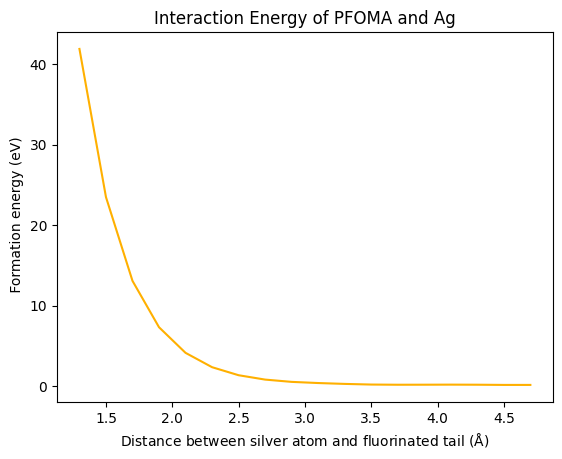

In [8]:
plt.plot(distances, formation_energies_eV, color='#FFB000')
plt.title('Interaction Energy of PFOMA and Ag')
plt.xlabel('Distance between silver atom and fluorinated tail ($\mathrm{\AA}$)')
plt.ylabel(' Formation energy (eV)')

## Uncertainty due to Basis Set Superposition Error (BSSE)

Re-calculate the interaction energy between PFOMA and Ag using counterpoise correction method.

Text(0, 0.5, 'BSSE corrected formation energy (eV)')

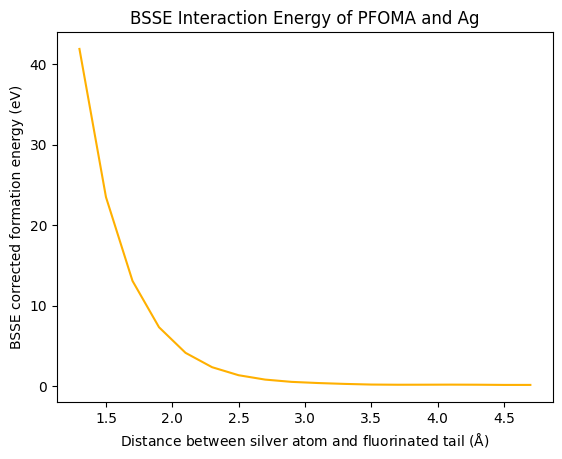

In [9]:
plt.plot(distances, formation_energies_eV, color='#FFB000')
plt.title('BSSE Interaction Energy of PFOMA and Ag')
plt.xlabel('Distance between silver atom and fluorinated tail ($\mathrm{\AA}$)')
plt.ylabel('BSSE corrected formation energy (eV)')

In [10]:
diff = np.abs(formation_energies_BSSE - formation_energies)

Text(0, 0.5, 'Total Energy (meV)')

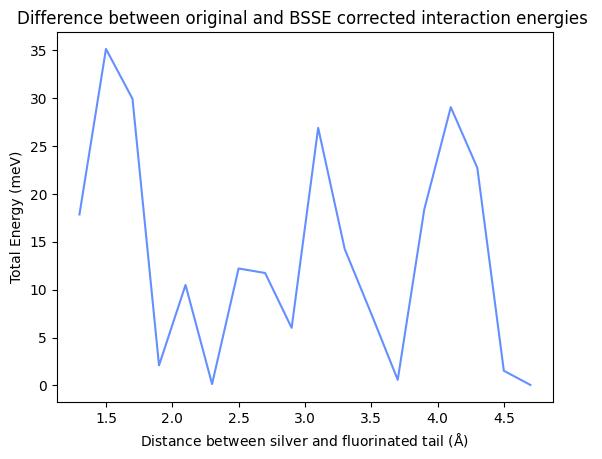

In [11]:
plt.plot(distances, diff, color='#648FFF')
plt.title('Difference between original and BSSE corrected interaction energies ')
plt.xlabel('Distance between silver and fluorinated tail ($\mathrm{\AA}$)')
plt.ylabel('Total Energy (meV)')

## Changing the metal atom

In [12]:
Au_PFOMA_hartree = np.array([-451.964009071364671, -452.854838551425473, -453.358841848369195,
              -453.646433710200711, -453.796542212416000, -453.884243929593993,
              -453.931883298815478, -453.957080930172538, -453.971145621783194,
              -453.978681142743199, -453.981853410274994, -453.989170231020637,
              -453.990636311111132, -453.985354900357777, -453.984849149489889,
              -453.985103193898738, -453.985427892683106, -453.984922638770797])

Au_PFOMA_meV = Au_PFOMA_hartree * 27211.382543519

Bi_PFOMA_hartree = np.array([-423.881572408509442, -424.846957718307237, -425.373930754170431,
                             -425.517193735927037, -425.895141626000566, -426.078905313010182,
                             -426.131670266578283, -426.200124542006904, -426.219303387659295,
                             -426.248450330908156, -426.241495751280127, -426.248170199219487,
                             -426.241227690000244, -426.243041399099241, -426.253983455880984,
                             -426.244213970566250, -426.244878657018717, -426.244506383756402])

Bi_PFOMA_meV = Bi_PFOMA_hartree * 27211.382543519

Zn_PFOMA_hartree = np.array([-480.370621132331394, -480.770542699965404, -480.996280716343222,
              -481.127064413888547, -481.206744757474382, -481.256617596238698,
              -481.287041018510649, -481.305247807689739, -481.317116920880039,
              -481.324346985036982, -481.327878508479102, -481.330088998360907,
              -481.331910552936279, -481.332505268623606, -481.332216101171753,
              -481.332588051347841, -481.332941423441412, -481.332466753389326])

Zn_PFOMA_meV = Zn_PFOMA_hartree *27211.382543519

Au = -33.145602661506793 * 27211.382543519
Bi = -5.451653305268113 * 27211.382543519
Zn = -60.487237343693565 * 27211.382543519
PFOMA = -420.845258342588920 *27211.382543519

In [13]:
formation_energie_Au = Au_PFOMA_meV - (PFOMA + Au)
formation_energie_Bi = Bi_PFOMA_meV - (PFOMA + Bi)
formation_energie_Zn = Zn_PFOMA_meV - (PFOMA + Zn)

formation_energie_Au_eV = formation_energie_Au *10**-3
formation_energie_Bi_eV = formation_energie_Bi * 10**-3
formation_energie_Zn_eV = formation_energie_Zn * 10**-3

Text(0, 0.5, 'Formation energy (eV)')

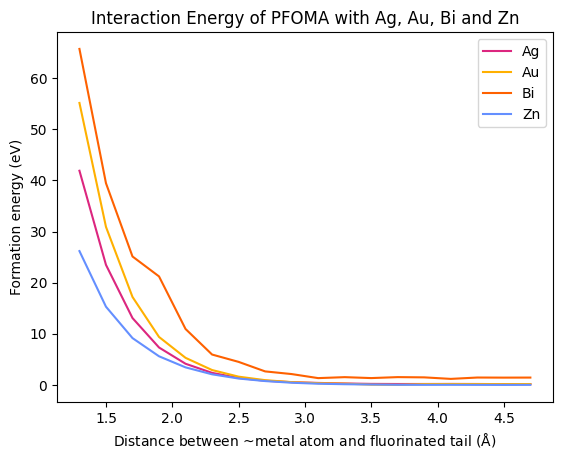

In [14]:
plt.plot(distances, formation_energies_eV, color='#DC267F', label = 'Ag')
plt.plot(distances, formation_energie_Au_eV, color='#FFB000', label = 'Au')
plt.plot(distances, formation_energie_Bi_eV, color='#FE6100', label = 'Bi')
plt.plot(distances, formation_energie_Zn_eV, color='#648FFF', label = 'Zn')
plt.title('Interaction Energy of PFOMA with Ag, Au, Bi and Zn')
plt.legend()
plt.xlabel('Distance between ~metal atom and fluorinated tail ($\mathrm{\AA}$)')
plt.ylabel('Formation energy (eV)')
#plt.savefig('IE_4metals.png')

(-0.1, 2.0)

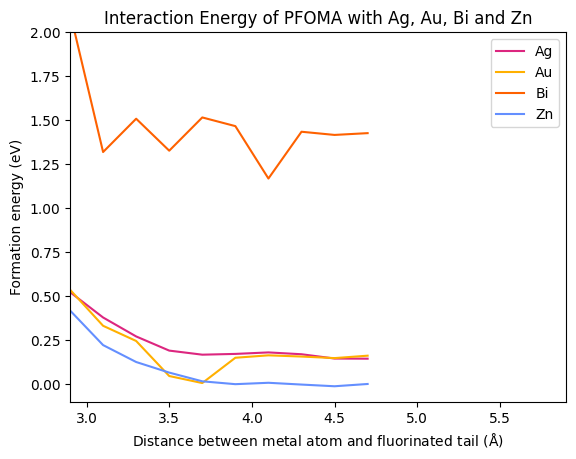

In [15]:
plt.plot(distances, formation_energies_eV, color='#DC267F', label = 'Ag')
plt.plot(distances, formation_energie_Au_eV, color='#FFB000', label = 'Au')
plt.plot(distances, formation_energie_Bi_eV, color='#FE6100', label = 'Bi')
plt.plot(distances, formation_energie_Zn_eV, color='#648FFF', label = 'Zn')
plt.title('Interaction Energy of PFOMA with Ag, Au, Bi and Zn')
plt.legend()
plt.xlabel('Distance between metal atom and fluorinated tail ($\mathrm{\AA}$)')
plt.ylabel('Formation energy (eV)')
plt.xlim(2.9, 5.9)
plt.ylim(-0.1, 02.0)
#plt.savefig('IE_4metals_zoom.png')

Text(0, 0.5, 'Difference in Formation energy (meV)')

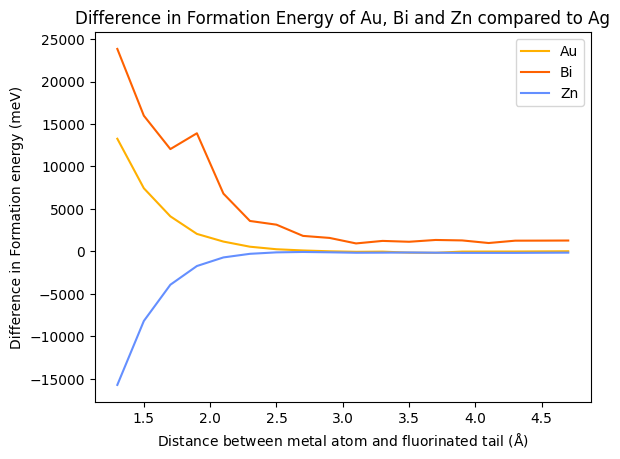

In [16]:
diff_Au = formation_energie_Au - formation_energies
diff_Bi = formation_energie_Bi - formation_energies
diff_Zn = formation_energie_Zn - formation_energies

plt.plot(distances, diff_Au, color='#FFB000', label = 'Au')
plt.plot(distances, diff_Bi, color='#FE6100', label = 'Bi')
plt.plot(distances, diff_Zn, color='#648FFF', label = 'Zn')
plt.title('Difference in Formation Energy of Au, Bi and Zn compared to Ag')
plt.legend()
plt.xlabel('Distance between metal atom and fluorinated tail ($\mathrm{\AA}$)')
plt.ylabel('Difference in Formation energy (meV)')

## Gold high res and hse_06 (add vdw later)

(-0.1, 1.8)

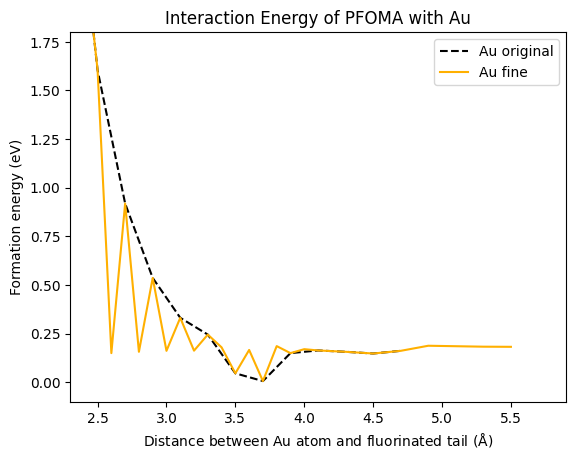

In [17]:
distances_highres = [1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 
                     3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.3,
                     4.5, 4.7, 4.9, 5.3, 5.5]

Au_PFOMA_hartree_hr = np.array([-451.964009071364671, -452.854838551425473, -453.358841848369195,
              -453.646433710200711, -453.796542212416000, -453.884243929593993,
              -453.931883298815478, -453.985354900328105, -453.957080930172538,
              -453.985103193898738, -453.971145621783194, -453.984922638770854,
              -453.978681142743199, -453.984890870716811, -453.981853410274994,
              -453.984262958841725, -453.989170231020637, -453.984753838678841,
              -453.990636311111132, -453.984029271597308, -453.985354900357777,
              -453.984609995378378, -453.984849149489889, -453.985103193898738,
              -453.985427892683106, -453.984922638770797, -453.983960966043298,
                             -453.984138249688215 ,-453.984164101189435])

Au_PFOMA_meV_hr = Au_PFOMA_hartree_hr* 27211.382543519

formation_energie_Au_hr = Au_PFOMA_meV_hr - (PFOMA + Au)
formation_energie_Au_eV_hr = formation_energie_Au_hr *10**-3

plt.plot(distances, formation_energie_Au_eV, color='black', label = 'Au original', linestyle = 'dashed')
plt.plot(distances_highres, formation_energie_Au_eV_hr, color='#FFB000', label = 'Au fine')
plt.title('Interaction Energy of PFOMA with Au')
plt.xlabel('Distance between Au atom and fluorinated tail ($\mathrm{\AA}$)')
plt.legend()
plt.ylabel('Formation energy (eV)')
plt.xlim(2.3, 5.9)
plt.ylim(-0.1, 01.8)
#plt.savefig('IE_Au_zoom.png')

In [20]:
distances_hse = [1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 
                     3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.3,
                     4.5, 4.7]

Au_PFOMA_hse = np.array([-451.483305357422466, -452.367234787912707,
 -452.864211669505380, -453.140832239888482, , -453.383885412616678,
  , -453.455853202082210, ,
  -453.477484977432880, -453.480481581848551, ,
   , -453.484383086712398, -453.483710785109167,
   -453.484235660534182, -453.484659526246105, -453.484026590576264])

Au_hse = -32.898746378448109
PFOMA_hse = -420.585574223296192

Au_PFOMA_hse_meV = Au_PFOMA_hse * 27211.382543519



'Au_PFOMA_hse = np.array([-451.483305357422466, -452.367234787912707, -452.864211669505380,\n              -453.646433710200711, , -453.383885412616678,\n              , -453.455853202082210, ,\n              -453.978681142743199, -453.981853410274994, -453.989170231020637,\n              -453.990636311111132, -453.985354900357777, -453.984849149489889,\n              -453.985103193898738, -453.985427892683106, -453.984922638770797])\n\nAu_PFOMA_hse_meV = Au_PFOMA_hse * 27211.382543519'

## Bi

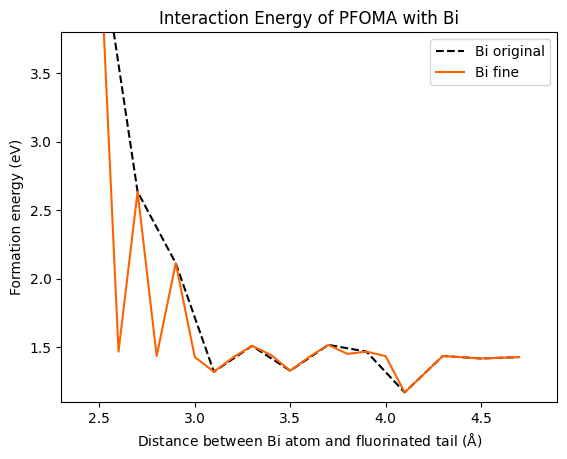

In [24]:
Bi_PFOMA_hartree = np.array([-423.881572408509442, -424.846957718307237, -425.373930754170431,
                             -425.517193735927037, -425.895141626000566, -426.078905313010182, 
                             -426.131670266578283, -426.243039816502574, -426.200124542006904,
                             -426.244213958468436, -426.219303387659295, -426.244506485877878,
                             -426.248450330908156, -426.244616743572067, -426.241495751280127,
                             -426.243950511256969, -426.248170199219487, -426.244454185223276,
                             -426.241227690000244, -426.243650596018142, -426.243041399099241,
                             -426.244244001073071, -426.253983455880984, -426.244213970566250, 
                             -426.244878657018717, -426.244506383756402])

Bi_PFOMA_meV_hr = Bi_PFOMA_hartree * 27211.382543519

formation_energie_Bi_hr = Bi_PFOMA_meV_hr - (PFOMA + Bi)
formation_energie_Bi_eV_hr = formation_energie_Bi_hr * 10**-3

plt.plot(distances, formation_energie_Bi_eV, color='black', label = 'Bi original', linestyle = 'dashed')
plt.plot(distances_highres, formation_energie_Bi_eV_hr, color='#FE6100', label = 'Bi fine')
plt.title('Interaction Energy of PFOMA with Bi')
plt.xlabel('Distance between Bi atom and fluorinated tail ($\mathrm{\AA}$)')
plt.legend()
plt.ylabel('Formation energy (eV)')
plt.xlim(2.3, 4.9)
plt.ylim(1.1, 03.8)
#plt.savefig('IE_Bi_zoom.png')

## Uncertainty due to angle of approach

Calculate the difference in interaction energy caused by varying the angle of approach by one degree.

In [ ]:
angle_15 = np.array([-455.849595742794293, ])
angle_30 = np.array([-454.278859517930812, -455.469761072755659, -456.343047541020837,
                     ])
angle_45 = 

In [15]:
diff01 = abs(formation_energies - formation_energies_1deg) 
diff12 = abs(formation_energies_1deg - formation_energies_2deg)


Text(0, 0.5, ' Energy(meV)')

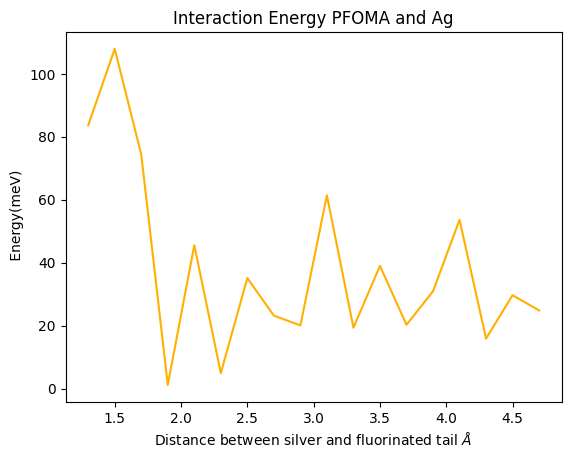

In [16]:
#.plot(distances, formation_energies, color='#FFB000')
#plt.plot(distances, formation_energies_1deg, color='#DC267F', label = '1 degree')

plt.plot(distances, diff01, color='#FFB000')
#plt.plot(distances, diff12, color='#DC267F', label = '1 degree')
plt.title('Interaction Energy PFOMA and Ag')
#plt.legend()
plt.xlabel('Distance between silver and fluorinated tail $\AA$')
plt.ylabel(' Energy(meV)')
#plt.yscale('log')